In [1]:


from keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

import numpy as np
import random

import graphviz
import numpy as np

from IPython.display import SVG
from scipy import misc ,ndimage

Using TensorFlow backend.


# data augmentation

In [2]:
def plots(ims,figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):

                ims = ims.transpose((0,2,3,1))
                
    f = plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
            sp=f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                 sp.set_title(titles[i],fontsize=16)
            plt.imshow(ims[i],interpolation=None if interp else 'none')
                
                
         


In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
    channel_shift_range=10, horizontal_flip=True,)

In [4]:
image_path='/home/kamel/Vidéos/data/banane/n.jpg'

/home/kamel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


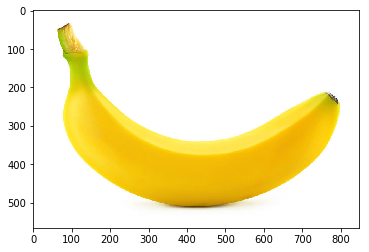

In [5]:
image=np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [6]:
int_gen= gen.flow(image)

In [ ]:
i = 0
for batch in gen.flow(image, batch_size=50,
                          save_to_dir='/home/kamel/Vidéos/jeuDnn/banane', save_prefix='aug', save_format='jpg'):
    i += 1
    if i > 50:
        break  

In [7]:
aug= [next(int_gen)[0].astype(np.uint8) for i in range(10)]


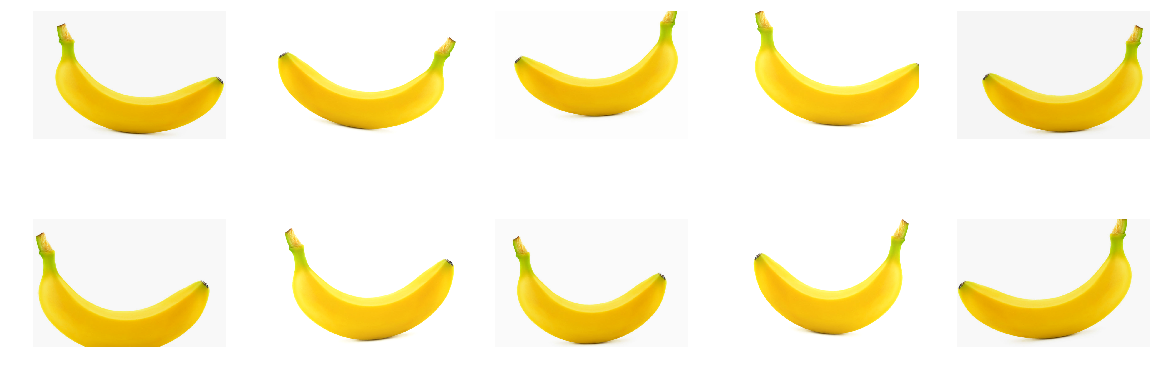

In [8]:
plots(aug,figsize=(20,7), rows=2)